<a href="https://colab.research.google.com/github/LiamDuero03/DS-Society-Project/blob/main/Extra ML Material/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression: Logic-Based Prediction
Unlike Linear Regression, which fits a continuous line, a **Decision Tree** breaks the data down into smaller subsets (nodes) based on feature values.

Think of it as a series of **If-Then** questions. It is highly flexible and can capture complex, non-linear patterns that a straight line would miss.

## 1. The Setup
We'll use `DecisionTreeRegressor` for the model and `plot_tree` to visualize the actual logic the computer builds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Generate Non-Linear Synthetic Data
Decision Trees excel at capturing curves. We will generate a **sine wave** with some added noise to simulate a real-world scenario where a simple straight line would fail.

In [2]:
# Generate non-linear synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Training the Model
In Decision Trees, the most important setting is `max_depth`.
* **Too shallow:** The model is too simple (Underfitting).
* **Too deep:** The model memorizes the noise (Overfitting).

We will start with a depth of 3 to keep the logic interpretable.

In [3]:
# Initialize and fit the model
# Let's start with a depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

## 4. Visualizing the Decision Logic
The "Tree" starts at the **Root Node** and splits until it reaches the **Leaf Nodes**. Each split is chosen to minimize the error (MSE) within the resulting groups.

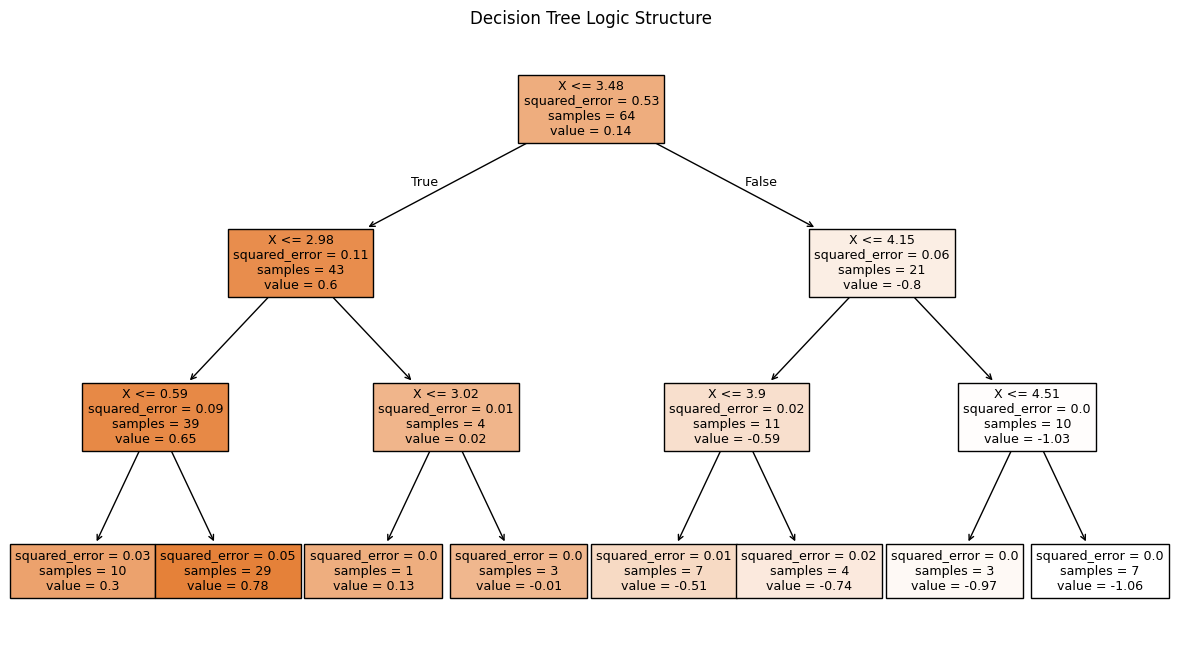

In [4]:
plt.figure(figsize=(15, 8))
plot_tree(tree_reg, filled=True, feature_names=['X'], precision=2)
plt.title("Decision Tree Logic Structure")
plt.show()

## 5. Visualizing the Prediction Line
Notice that the prediction line isn't smooth—it looks like a series of **steps**. This is because every data point within a specific "leaf" gets the same predicted value (the average of the training points in that leaf).

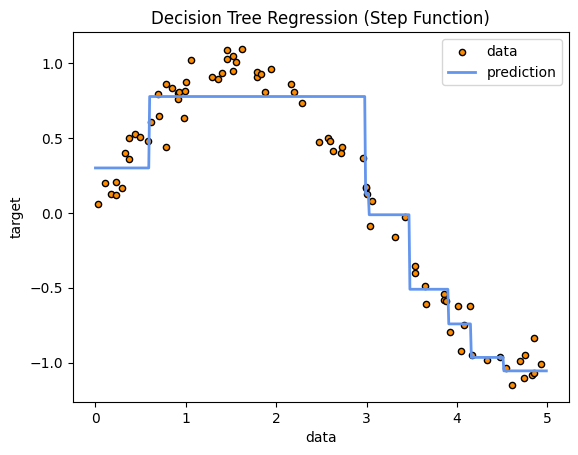

In [5]:
# Predict
X_grid = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_grid_pred = tree_reg.predict(X_grid)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_grid, y_grid_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression (Step Function)")
plt.legend()
plt.show()

## 6. Model Evaluation
We use the same metrics as Linear Regression to see how well our tree is performing.

In [6]:
y_pred = tree_reg.predict(X_test)

print("--- Decision Tree Performance ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

--- Decision Tree Performance ---
MAE: 0.1366
RMSE: 0.1599
R² Score: 0.9381


## 7. Analyzing the Results
With an **$R^2$ Score of 0.9381**, this model is performing exceptionally well.

Compared to our Linear Regression model, the errors (**MAE** and **RMSE**) are much lower. This is because the Decision Tree can "bend" its predictions to follow the curves of the sine wave, whereas a linear model would be forced to stay in a straight line.

## 8. The Danger Zone: Overfitting
While a score of 0.93 is great, Decision Trees have a tendency to **overfit**.

* If we set `max_depth` to 20, the $R^2$ might go to 0.99, but the model would just be "connecting the dots" of the noise.
* If we set `max_depth` to 1, we would get a very high error because the model is too simple.

### Summary of Decision Tree Regressors
| Pros | Cons |
| :--- | :--- |
| Captures non-linear relationships | Very prone to overfitting |
| Easy to visualize and explain | Sensitive to small changes in data |
| No need for feature scaling | Can become overly complex (deep) |